In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [8]:
x = np.array([i*np.pi/180 for i in range(10,360,3)])

In [9]:
np.random.seed(10)

In [10]:
y=np.sin(x)+np.random.normal(0,1.15,len(x))

In [13]:
data=pd.DataFrame(np.column_stack([x,y]), columns=['x', 'y'])

In [14]:
data.head()

,x,y
0,0.174533,1.704973
1,0.226893,1.047522
2,0.279253,-1.501573
3,0.331613,0.315927
4,0.383972,1.089143


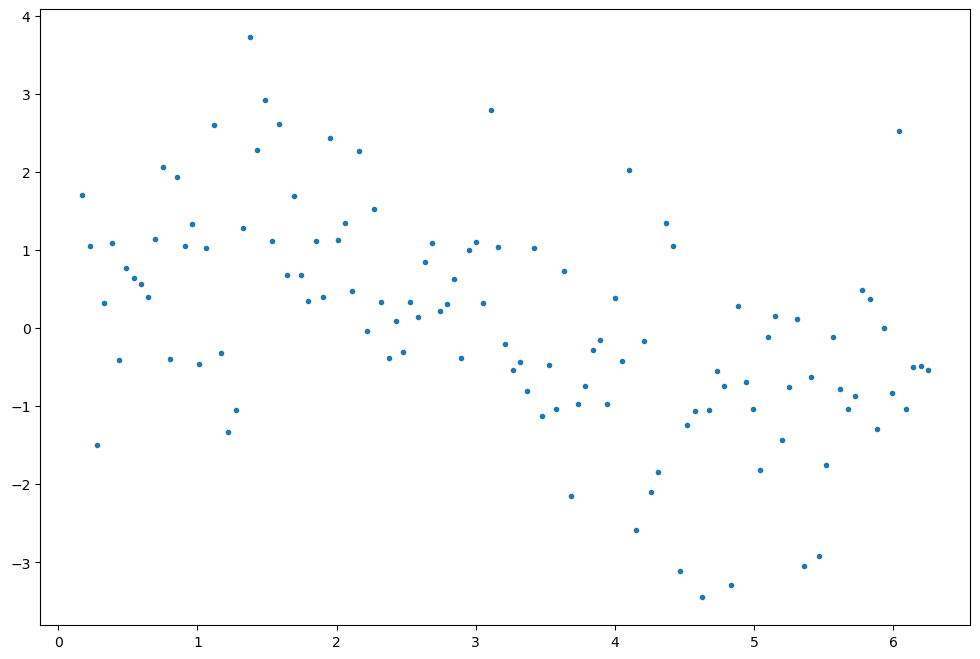

In [16]:
plt.figure(figsize=(12, 8))
plt.plot(data['x'], data['y'], '.')

In [17]:
for i in range(2, 16):
    colname='x_%d'%i
    data[colname]=data['x']**i
    data.head()

In [18]:
data['randNumCol'] = np.random.randint(1, 6, data.shape[0])
train=data[data['randNumCol']<=3]
test=data[data['randNumCol']>3]
train = train.drop('randNumCol', axis=1)
test = test.drop('randNumCol', axis=1)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
X_train = train.drop('y', axis=1).values
y_train = train['y'].values
X_test = test.drop('y', axis=1).values
y_test = test['y'].values

Training Error (MSE): 1.5355339066245492
Testing Error (MSE): 1.2142922546032298


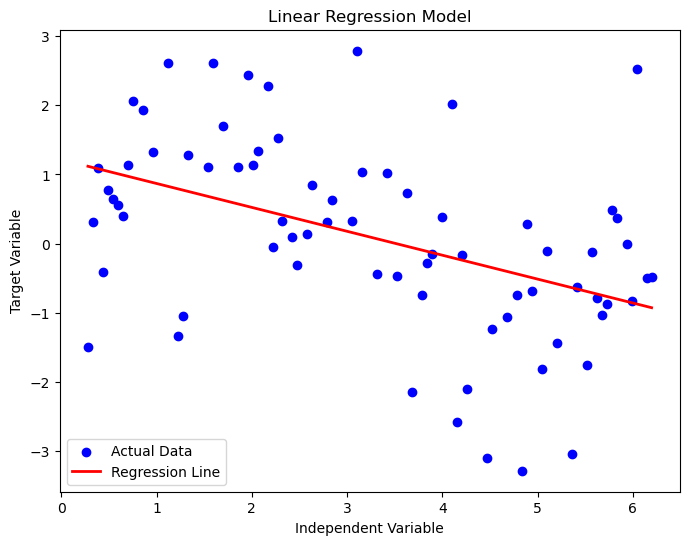

In [27]:
# Ensure X_train and X_test are NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

# Extract the independent variable
independent_variable_train = X_train[:, 0:1]  # Keep as 2D array

# Use StandardScaler for normalization
scaler = StandardScaler()
independent_variable_train_scaled = scaler.fit_transform(independent_variable_train)

# Initialize and fit the Linear Regression model
linreg = LinearRegression()
linreg.fit(independent_variable_train_scaled, y_train)

# Predictions
y_train_pred = linreg.predict(independent_variable_train_scaled)

# Calculate RSS (Residual Sum of Squares)
rss_train = np.mean((y_train_pred - y_train) ** 2)  # Use mean instead of sum

# Process test data
independent_variable_test = X_test[:, 0:1]  # Keep as 2D array
independent_variable_test_scaled = scaler.transform(independent_variable_test)

y_test_pred = linreg.predict(independent_variable_test_scaled)
rss_test = np.mean((y_test_pred - y_test) ** 2)  # Use mean

# Print errors
print("Training Error (MSE):", rss_train)
print("Testing Error (MSE):", rss_test)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], y_train, color="blue", label="Actual Data")  # Scatter plot for actual points
plt.plot(X_train[:, 0], y_train_pred, color="red", linewidth=2, label="Regression Line")  # Line plot for prediction
plt.xlabel("Independent Variable")
plt.ylabel("Target Variable")
plt.legend()
plt.title("Linear Regression Model")
plt.show()


Training Error (MSE): 1.1751996998776228
Testing Error (MSE): 1.346339216880497


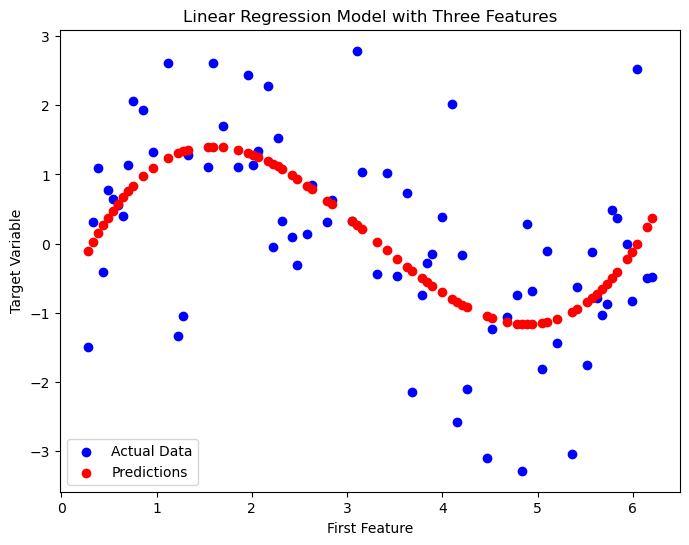

In [29]:
# Ensure X_train and X_test are NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

# Extract three features
independent_variable_train = X_train[:, 0:3]  # Keep as 2D array

# Use StandardScaler for normalization
scaler = StandardScaler()
independent_variable_train_scaled = scaler.fit_transform(independent_variable_train)

# Initialize and fit the Linear Regression model
linreg = LinearRegression()
linreg.fit(independent_variable_train_scaled, y_train)

# Predictions
y_train_pred = linreg.predict(independent_variable_train_scaled)

# Calculate RSS (Residual Sum of Squares) - Use mean instead of sum
rss_train = np.mean((y_train_pred - y_train) ** 2)  # Mean Squared Error (MSE)

# Process test data
independent_variable_test = X_test[:, 0:3]  # Keep as 2D array
independent_variable_test_scaled = scaler.transform(independent_variable_test)

y_test_pred = linreg.predict(independent_variable_test_scaled)
rss_test = np.mean((y_test_pred - y_test) ** 2)  # Mean Squared Error (MSE)

# Print errors
print("Training Error (MSE):", rss_train)
print("Testing Error (MSE):", rss_test)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], y_train, color="blue", label="Actual Data")  # Scatter plot for actual points
plt.scatter(X_train[:, 0], y_train_pred, color="red", label="Predictions")  # Scatter plot for predictions
plt.xlabel("First Feature")
plt.ylabel("Target Variable")
plt.legend()
plt.title("Linear Regression Model with Three Features")
plt.show()


In [30]:
# defining a function which will fit linear regression model, plot the results, and return the coefficients
def linear_regression(train_x, train_y, test_x, test_y, features, models_to_plot):
        
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(train_x,train_y)
    train_y_pred = linreg.predict(train_x)
    test_y_pred = linreg.predict(test_x)
    
    #Check if a plot is to be made for the entered features
    if features in models_to_plot:
        plt.subplot(models_to_plot[features])
        plt.tight_layout()
        plt.plot(train_x[:,0:1],train_y_pred)
        
        plt.plot(train_x[:,0:1],train_y,'.')
        
        plt.title('Number of Predictors: %d'%features)
    
    #Return the result in pre-defined format
    rss_train = sum((train_y_pred-train_y)**2)/train_x.shape[0]
    ret = [rss_train]
    
    rss_test = sum((test_y_pred-test_y)**2)/test_x.shape[0]
    ret.extend([rss_test])
    
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    
    return ret

Training Error (RSS): 80.51425873992018
Testing Error (RSS): 83.21616726337611


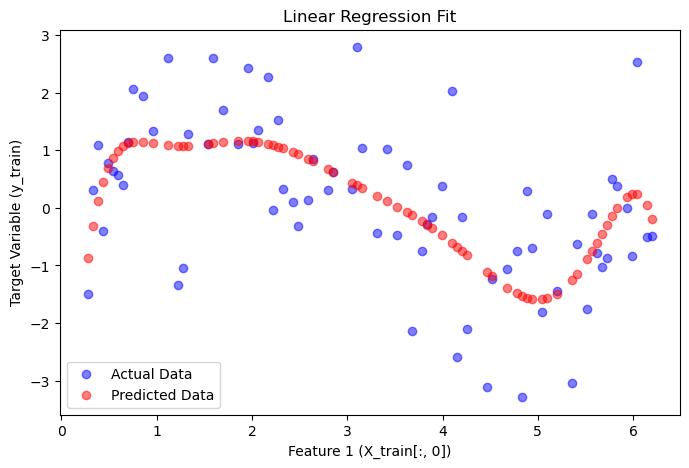

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Normalize the data (since normalize=True is deprecated)
scaler = StandardScaler()

# Scaling both the training and testing data
X_train_scaled = scaler.fit_transform(X_train[:, 0:9])  # First 9 features for training
X_test_scaled = scaler.transform(X_test[:, 0:9])        # Scaling for test data

# Initialize and train the linear regression model
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

# Predictions on both training and test data
y_train_pred = linreg.predict(X_train_scaled)
y_test_pred = linreg.predict(X_test_scaled)

# Residual Sum of Squares (RSS) calculation
rss_train = np.sum((y_train_pred - y_train) ** 2)  # Train RSS
rss_test = np.sum((y_test_pred - y_test) ** 2)    # Test RSS

# Printing results
print("Training Error (RSS):", rss_train)
print("Testing Error (RSS):", rss_test)

# Plotting predictions vs actual data
plt.figure(figsize=(8, 5))
plt.scatter(X_train[:, 0], y_train, label="Actual Data", color="blue", alpha=0.5)
plt.scatter(X_train[:, 0], y_train_pred, label="Predicted Data", color="red", alpha=0.5)
plt.xlabel("Feature 1 (X_train[:, 0])")
plt.ylabel("Target Variable (y_train)")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()


In [31]:
col = ['mrss_train','mrss_test','intercept'] + ['coef_Var_%d'%i for i in range(1,16)]
ind = ['Number_of_variable_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

In [32]:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

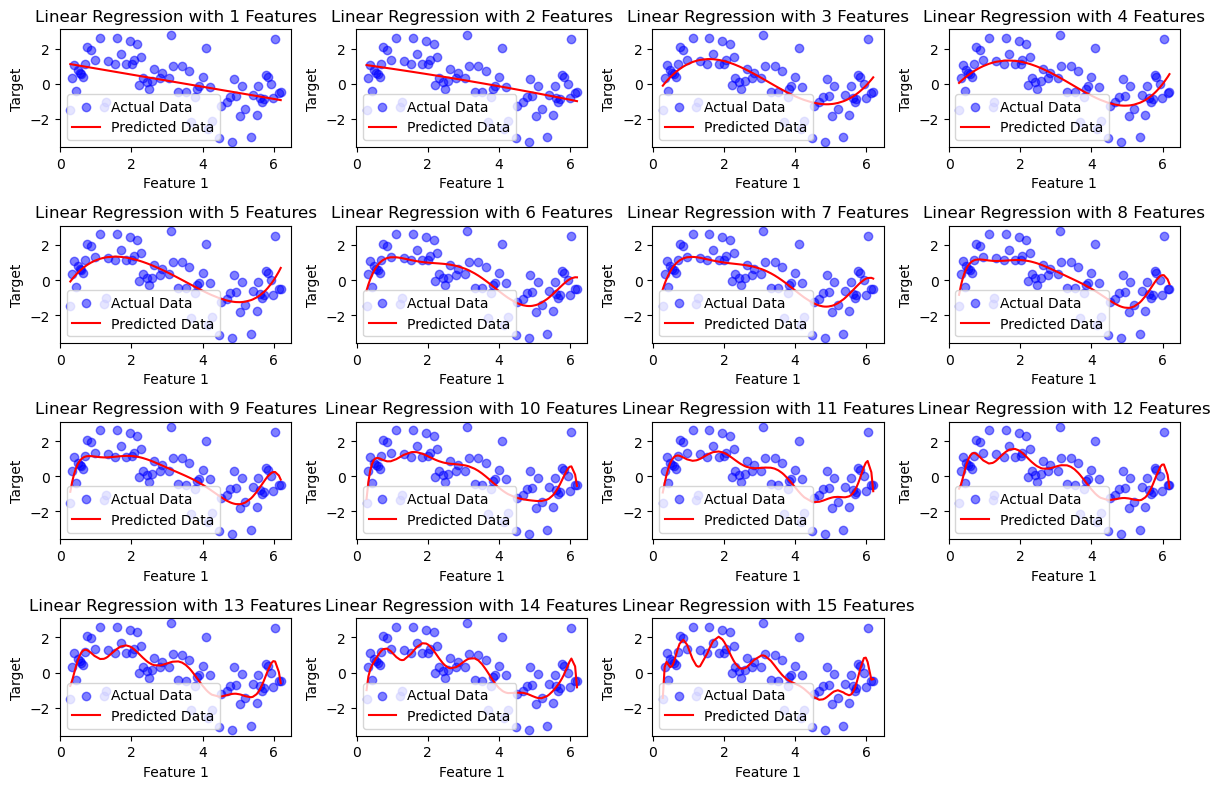

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

plt.figure(figsize=(12, 8))

for i in range(1, 16):
    # Prepare the data
    train_x = X_train[:, 0:i]  # Selecting the first 'i' features
    test_x = X_test[:, 0:i]    # Selecting the first 'i' features
    
    train_y = y_train
    test_y = y_test
    
    # Normalize the data using StandardScaler
    scaler = StandardScaler()
    train_x_scaled = scaler.fit_transform(train_x)  # Scale training data
    test_x_scaled = scaler.transform(test_x)        # Scale test data using the same scaler

    # Train the linear regression model
    linreg = LinearRegression()
    linreg.fit(train_x_scaled, train_y)

    # Predictions
    y_train_pred = linreg.predict(train_x_scaled)
    y_test_pred = linreg.predict(test_x_scaled)

    # If you need to assign results (e.g., coefficients, errors) to coef_matrix_simple
    coef_matrix_simple.iloc[i-1, 0:i+3] = [*linreg.coef_, linreg.intercept_, np.sum((y_train_pred - train_y) ** 2), np.sum((y_test_pred - test_y) ** 2)]

    # Plotting the predictions against the first feature of train_x
    plt.subplot(4, 4, i)  # Creating a grid of subplots (4x4 grid)
    plt.scatter(train_x[:, 0], train_y, color='blue', alpha=0.5, label='Actual Data')
    plt.plot(train_x[:, 0], y_train_pred, color='red', label='Predicted Data')
    plt.title(f'Linear Regression with {i} Features')
    plt.xlabel('Feature 1')
    plt.ylabel('Target')
    plt.legend()

plt.tight_layout()  # Adjusting subplots to fit nicely
plt.show()


In [45]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,mrss_train,mrss_test,intercept,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,coef_Var_8,coef_Var_9,coef_Var_10,coef_Var_11,coef_Var_12,coef_Var_13,coef_Var_14,coef_Var_15
Number_of_variable_1,-0.63,0.088,1.1e+02,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_2,-0.51,-0.13,0.088,1.1e+02,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_3,6,-17,10,0.088,86,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_4,4.2,-8.9,-0.8,5.1,0.088,85,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_5,6.9,-26,39,-35,15,0.088,85,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_6,26,-1.9e+02,6e+02,-9.6e+02,7.5e+02,-2.2e+02,0.088,82,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_7,21,-1.3e+02,3.5e+02,-3.8e+02,11,2.6e+02,-1.3e+02,0.088,82,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_8,59,-6.5e+02,3.4e+03,-1e+04,1.8e+04,-1.8e+04,1e+04,-2.4e+03,0.088,81,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_9,67,-7.9e+02,4.4e+03,-1.4e+04,2.7e+04,-3.3e+04,2.3e+04,-8.6e+03,1.3e+03,0.088,81,83,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_10,2.2e+02,-3.5e+03,2.8e+04,-1.3e+05,3.7e+05,-6.9e+05,8.3e+05,-6.2e+05,2.6e+05,-4.8e+04,0.088,78,1.1e+02,NaN,NaN,NaN,NaN,NaN


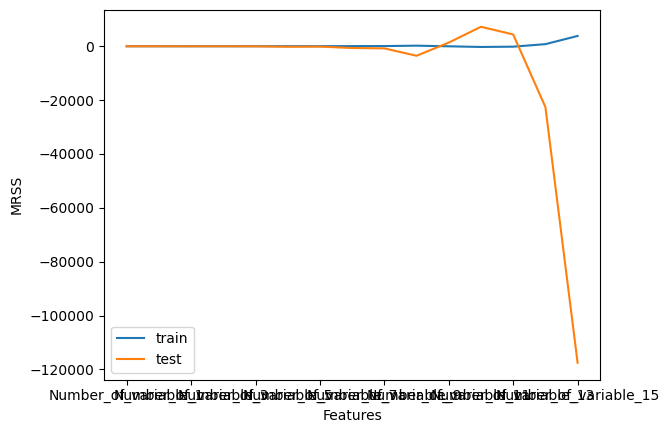

In [46]:
coef_matrix_simple[['mrss_train','mrss_test']].plot()
plt.xlabel('Features')
plt.ylabel('MRSS')
plt.legend(['train', 'test'])

In [50]:
from sklearn.linear_model import Ridge

# Define the alpha_ridge value (regularization strength)
alpha_ridge = 1.0  # Example value; you can adjust it as needed

# Initialize Ridge Regression model with the defined alpha value
ridge_model = Ridge(alpha=alpha_ridge)

# Example: fit the model (assuming you have X_train and y_train)
ridge_model.fit(X_train, y_train)

# Now you can use alpha_ridge and ridge_model for further calculations
print("Ridge Regression Model Coefficients:", ridge_model.coef_)


Ridge Regression Model Coefficients: [ 4.18130982e-01  2.59796417e-01  1.15423617e-01  7.40003164e-02
  5.04025376e-02 -4.50013556e-02 -1.38798425e-01 -1.82904140e-02
  1.76957352e-01 -1.32999784e-01  4.80116018e-02 -9.90594766e-03
  1.19677158e-03 -7.90740510e-05  2.21263046e-06]


In [49]:
import pandas as pd
import numpy as np

# Example initialization of coef_matrix_ridge (if it's a DataFrame)
# Here, we assume it has some data like coefficients of a regression model
coef_matrix_ridge = pd.DataFrame(np.random.randn(10, 5), columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5'])

# Now, apply the lambda function to count the zeros in each row (axis=1)
zeros_count = coef_matrix_ridge.apply(lambda x: sum(x.values == 0), axis=1)

print(zeros_count)


0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int32


In [51]:
from sklearn.linear_model import Lasso

In [52]:
alpha_lasso = [0, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

In [53]:
# defining a function which will fit lasso regression model, plot the results, and return the coefficients
def lasso_regression(train_x, train_y, test_x, test_y, alpha, models_to_plot={}):
    #Fit the model
    if alpha == 0:
        lassoreg = LinearRegression(normalize=True)
        lassoreg.fit(train_x, train_y)
        train_y_pred = lassoreg.predict(train_x)
        test_y_pred = lassoreg.predict(test_x)
        
    else:
        lassoreg = Lasso(alpha=alpha,normalize=True)
        lassoreg.fit(train_x,train_y)
        train_y_pred = lassoreg.predict(train_x)
        test_y_pred = lassoreg.predict(test_x)
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(train_x[:,0:1],train_y_pred)
        plt.plot(train_x[:,0:1],train_y,'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    mrss_train = sum((train_y_pred-train_y)**2)/train_x.shape[0]
    ret = [mrss_train]
    
    mrss_test = sum((test_y_pred-test_y)**2)/test_x.shape[0]
    ret.extend([mrss_test])
    
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    

In [54]:
col = ['mrss_train','mrss_test','intercept'] + ['coef_Var_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

In [55]:
models_to_plot = {0:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

In [59]:
plt.figure(figsize=(12,8))
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(train_x, train_y, test_x, test_y, alpha_lasso[i], models_to_plot)

TypeError: lasso_regression() takes 5 positional arguments but 6 were given

<Figure size 1200x800 with 0 Axes>

In [60]:
coef_matrix_lasso[['mrss_train','mrss_test']].plot()
plt.xlabel('Alpha Values')
plt.ylabel('MRSS')
plt.legend(['train', 'test'])

KeyError: "None of [Index(['mrss_train', 'mrss_test'], dtype='object')] are in the [columns]"

In [61]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

0     0
1    15
2    15
3    15
4    15
5    15
6    15
7    15
8    15
9    15
dtype: int32